<a href="https://colab.research.google.com/github/carloscarrascochozo/proyecto1-parte5/blob/main/proyecto1_parte5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREPARACIÓN DE ÁREA DE TRABAJO


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTACION DE LIBRERIAS

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ,StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib
#from sklearn.metrics import roc_auc_score, plot_roc_curve

#LIMPIEZA DE DATOS


In [38]:
data = "/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/sales_predictions.csv"
df = pd.read_csv(data)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
#duplicados
df.duplicated().sum()

0

In [41]:
df['Item_Weight'].value_counts()


Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [42]:
#se eliminará Item_Weight ya que no tiene nada que ver con nustra variable objetivo
df.drop(columns=['Item_Weight'],inplace=True)

In [43]:
#se eliminarar tamaño de la tienda que tampoco no tiene nada que ver con nuestra variable objetivo
df.drop(columns=['Outlet_Size'],inplace=True)

In [44]:
#tampoco nos sirve tipo de ubicacion del local
df.drop(columns=['Outlet_Location_Type'],inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [46]:
#Buscamos la cantidad de nulos por cada columna, al hacer dicha búsqueda nos damos cuenta que no tenemos nulos
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [48]:
#observamos que la columa Item_Fat_Content tiene nombres parecidos
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [49]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [50]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

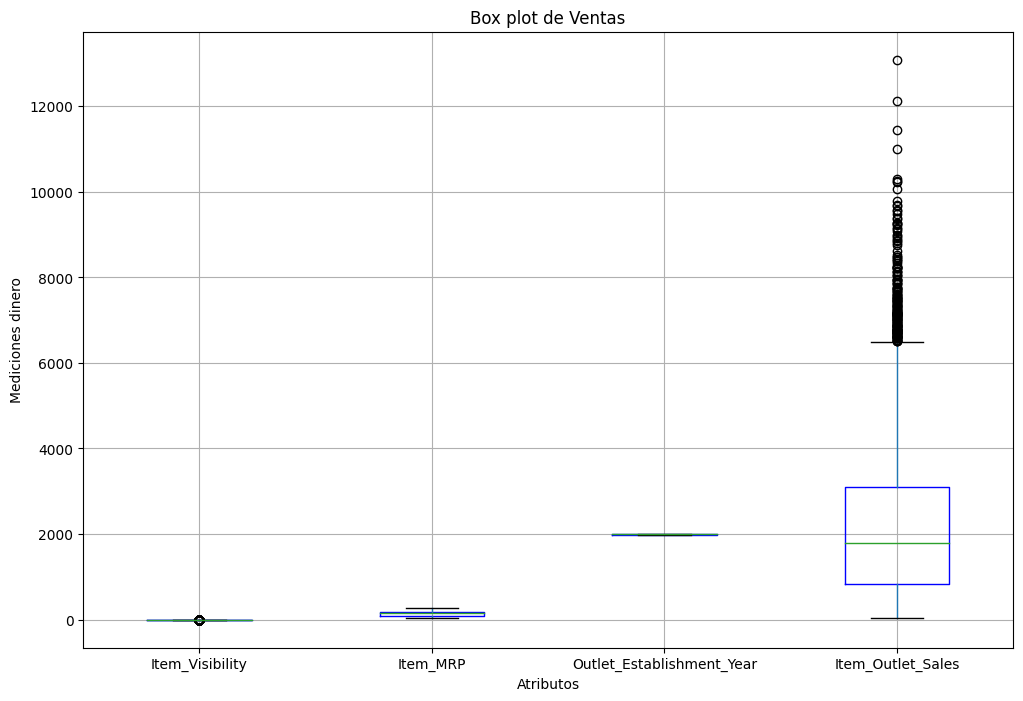

In [51]:
#IDENTIFICAMOS VALORES ATÍPICOS
df.boxplot(rot = 0, boxprops=dict(color = 'blue'), return_type='axes', figsize=(12,8))
plt.title("Box plot de Ventas")
plt.suptitle("")
plt.xlabel("Atributos")
plt.ylabel("Mediciones dinero")
plt.show()

#Item_Outlet_Sales: La mayoría de las ventas están entre 0 y 10.000, con algunos valores atípicos por encima de 10.000.

In [52]:
df['Item_Outlet_Sales'].value_counts()

Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: count, Length: 3493, dtype: int64

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.29,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800


In [54]:
#reemplazamos con "0" los valores faltanto en Item_Visibility
df["Item_Visibility"] = df["Item_Visibility"].replace(0, df.Item_Visibility.mean())

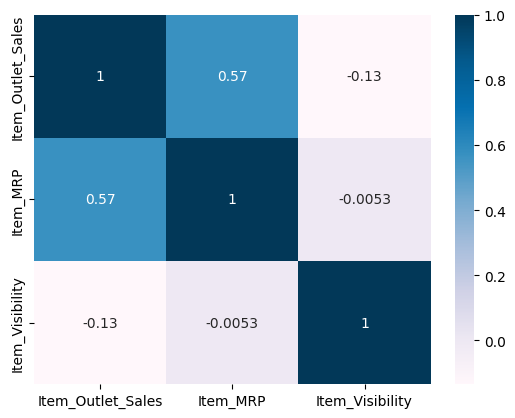

In [55]:
#creamos un heatmap para observar si hay relaciones o no con la columna Item_Visibility

df1 = df[['Item_Outlet_Sales','Item_MRP','Item_Visibility']]
sns.heatmap(df1.corr(), cmap='PuBu', annot = True)
plt.show()

In [56]:
#notamos que la columna 'Outlet_Establishment_Year', entonces la ordenamos de menor a mayor
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].sort_values(ascending=True)
df


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700
3,FDX07,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800
4,NCD19,Low Fat,0.066132,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Supermarket Type2,1845.5976


In [57]:
#Ventas anuales
gb_1 = df.groupby(["Outlet_Establishment_Year"])["Item_Outlet_Sales"].sum().round(2)#.unstack(level="Ciudad")
gb_1

Outlet_Establishment_Year
1985    3633620.14
1987    2142663.58
1997    2118395.17
1998     188340.17
1999    2183969.81
2002    2036725.48
2004    2268122.94
2007    2167465.29
2009    1851822.83
Name: Item_Outlet_Sales, dtype: float64

In [58]:
gb_1.index

Index([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype='int64', name='Outlet_Establishment_Year')

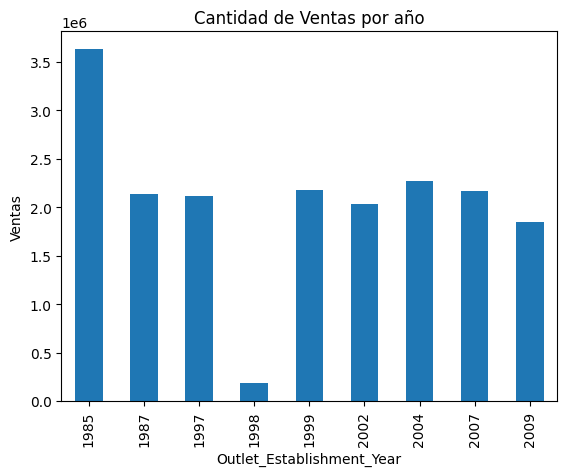

In [59]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Ventas')
ax.set_xlabel('años')
#Colocamos una etiqueta en el eje X
ax.set_title('Cantidad de Ventas por año')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
gb_1.plot(kind="bar")
#plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

#Se hizo un gráfico de barras de meses por año donde el año mas bajo en ventas se puede apreciar que fue en 1998 y que hasta ahora año en que mas se vendió fue en 1985

#PREPROCESAMIENTO

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [61]:
X=df.drop(columns=['Item_Outlet_Sales']) #característica X
y=df['Item_Outlet_Sales']#variable objetivo y

In [ ]:
X.shape

(8523, 8)

In [62]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [63]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7898a2ccab30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7898a2cc97e0>)])

In [64]:
col_transformer.fit(X) #entrenamos

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7898a2ccab30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7898a2cc97e0>)])

In [65]:
#luego de entrenar entonces vamos a transformar
aux = col_transformer.transform(X)
aux

<8523x1594 sparse matrix of type '<class 'numpy.float64'>'
	with 68184 stored elements in Compressed Sparse Row format>

In [66]:
aux.toarray()

array([[-1.11135787,  1.74745381,  0.13954076, ...,  1.        ,
         0.        ,  0.        ],
       [-1.04506727, -1.48902325,  1.33410274, ...,  0.        ,
         1.        ,  0.        ],
       [-1.09673346,  0.01004021,  0.13954076, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.71867224, -0.89720755,  0.73682175, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.53896846, -0.60797692,  1.33410274, ...,  0.        ,
         1.        ,  0.        ],
       [-0.51981553, -1.05226104, -0.09937163, ...,  1.        ,
         0.        ,  0.        ]])

In [70]:
#aux=col_transformer.transform(X)
X_procesado = pd.DataFrame(aux.toarray(), columns=col_transformer.get_feature_names_out())
X_procesado.info()
df_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1594 entries, pipeline-1__Item_Visibility to pipeline-2__Outlet_Type_Supermarket Type3
dtypes: float64(1594)
memory usage: 103.7 MB


,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,pipeline-2__Item_Identifier_DRB25,...,pipeline-2__Outlet_Identifier_OUT019,pipeline-2__Outlet_Identifier_OUT027,pipeline-2__Outlet_Identifier_OUT035,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
0,-1.111358,1.747454,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.045067,-1.489023,1.334103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.096733,0.010040,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.083740,0.660050,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.083740,-1.399220,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.275551,1.180783,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,-0.476643,-0.527301,0.497909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,-0.718672,-0.897208,0.736822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,1.538968,-0.607977,1.334103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [106]:
# @title Dividemos nuestro data set
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.3, random_state=47)

In [107]:
X_train

,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,pipeline-2__Item_Identifier_DRB25,...,pipeline-2__Outlet_Identifier_OUT019,pipeline-2__Outlet_Identifier_OUT027,pipeline-2__Outlet_Identifier_OUT035,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
4409,-0.334077,-0.860863,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1971,1.213086,1.560832,-0.099372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6945,-0.462782,0.761136,-1.532846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7411,1.949342,0.499164,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
731,-1.080800,-1.532340,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,0.986572,0.546707,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2896,0.600449,0.858378,-1.532846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6728,0.127643,0.239304,-1.532846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1926,0.585829,0.889397,0.736822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
y_train

4409     878.8560
1971    5033.4480
6945    5238.5144
7411    4466.1864
731     1039.9796
          ...    
3095     529.3110
2896    4697.8848
6728     473.3838
1926    2167.8448
5255    4261.1200
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [109]:
X_test

,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,pipeline-2__Item_Identifier_DRB25,...,pipeline-2__Outlet_Identifier_OUT019,pipeline-2__Outlet_Identifier_OUT027,pipeline-2__Outlet_Identifier_OUT035,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
988,0.789861,0.333460,-0.099372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7286,-0.083740,-1.298175,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4323,-1.156035,-1.502885,0.497909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7991,0.908088,-0.845354,-0.099372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2357,0.331309,0.165010,-1.532846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7691,0.240685,-1.674547,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2751,2.369603,-1.025510,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
525,-0.160078,1.363602,-0.099372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6777,0.977170,0.870676,1.334103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
y_test

988     2888.2404
7286    1102.5648
4323     978.7260
7991    2833.6448
2357    2439.4912
          ...    
7691     849.5608
2751    2239.7512
525     5416.9488
6777    2356.9320
497     7094.7648
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [ ]:
# @title Algoritmo - Modelo de regresión lineal
#minimo error posible, encontramos los mejores iperparametros (MSE)
#R*2 = que tanto está variando de los valores reales de la varianza 0 y 1
# cuando el valor está en 0 o negativo estamos super mal y entre mas cercano a 1 (es bastante bueno)
# todo es depende de la magnitud del problema, si no funciona regresion lineal no se puede mover ipermarametro entonces ir a otro modelo inmediatamente
#métricas siempre se sacan al y_test ... (y_train para observar si tiene overfitting)

#tenemos que tener y_test y y_predicho

#MAE nos permite ver el error de predicción, que tanto está haciendo mi error agregado
#mas cercano sea a 0 error agregado es pequeño, y mas grande es q mas nos estamos equivocando
# ver la magnitud de la variable objetivo

#RMSE = penalizar fuertes a los errores grandes y minimizar a errores pequños



In [111]:
line_reg = LinearRegression() #creación de objeto regresor

In [112]:
lin_reg.fit(X_train, y_train) #entrenamos

LinearRegression()

In [113]:
#calculamos las metricas de entrenamiento
lin_reg.score(X_train, y_train)

0.6578371573549967

In [114]:
#calculamos las metriscas de test R2
lin_reg.score(X_test, y_test)

-7.80483177228705e+21

In [115]:
y_pred = lin_reg.predict(X_test)

In [116]:
#resultados
resultados=pd.DataFrame()
resultados["Y real"]=y_test
resultados["Y predicho"]=y_pred
resultados

,Y real,Y predicho
988,2888.2404,1572.0
7286,1102.5648,1004.0
4323,978.7260,790.0
7991,2833.6448,1848.0
2357,2439.4912,2674.0
...,...,...
7691,849.5608,838.0
2751,2239.7512,1268.0
525,5416.9488,3432.0
6777,2356.9320,2700.0


#observamos que tenemos errores muy grandes tal como nos muestra nuestro R2

In [117]:
#métricas de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)



In [118]:
print(mae)
print(mse)
print(rmse)

10310681810745.166
2.1809488645264165e+28
147680359714026.2


#¿Hay algo que se puede hacer para cambiar el módelo?
#Lo que se puede hacer es cambiar de modelo para tener una mejor predicción ya que algunos datos no son lineales y eso afecta a la hora de crear las predicciones


#¿Qué características están más asociadas con la predicción de ventas mayores?
#la caracteriasticas que está mas asociada a la predicción de ventas es:
#Item_Visibility  y Outlet_Establishment_Year